<a href="https://colab.research.google.com/github/Shahzodgithub/data_science_practice/blob/main/churn_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/Shahzodgithub/data_science_practice/main/churn-utf-8.txt")
df.head(12)

,Штат,Длина счета,Код зоны,Номер телефона,Услуга международных звонков,Услуга VMail,Количество VMail,Дневные минуты,Дневные звонки,Дневная оплата,Вечерние минуты,Вечерние звонки,Вечерняя оплата,Ночные минуты,Ночные звонки,Ночная оплата,Международные минуты,Международные звонки,Международная оплата,Обращений в СЦ,Уход
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,True,False,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,False,False,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,True,True,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Штат                          3333 non-null   object 
 1   Длина счета                   3333 non-null   int64  
 2   Код зоны                      3333 non-null   int64  
 3   Номер телефона                3333 non-null   object 
 4   Услуга международных звонков  3333 non-null   bool   
 5   Услуга VMail                  3333 non-null   bool   
 6   Количество VMail              3333 non-null   int64  
 7   Дневные минуты                3333 non-null   float64
 8   Дневные звонки                3333 non-null   int64  
 9   Дневная оплата                3333 non-null   float64
 10  Вечерние минуты               3333 non-null   float64
 11  Вечерние звонки               3333 non-null   int64  
 12  Вечерняя оплата               3333 non-null   float64
 13  Ноч

In [6]:
df.describe()

,Длина счета,Код зоны,Количество VMail,Дневные минуты,Дневные звонки,Дневная оплата,Вечерние минуты,Вечерние звонки,Вечерняя оплата,Ночные минуты,Ночные звонки,Ночная оплата,Международные минуты,Международные звонки,Международная оплата,Обращений в СЦ
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
df.columns

Index(['Штат', 'Длина счета', 'Код зоны', 'Номер телефона',
       'Услуга международных звонков', 'Услуга VMail', 'Количество VMail',
       'Дневные минуты', 'Дневные звонки', 'Дневная оплата', 'Вечерние минуты',
       'Вечерние звонки', 'Вечерняя оплата', 'Ночные минуты', 'Ночные звонки',
       'Ночная оплата', 'Международные минуты', 'Международные звонки',
       'Международная оплата', 'Обращений в СЦ', 'Уход'],
      dtype='object')

In [8]:
df['Код зоны'] = df['Код зоны'].astype('object')
df['Уход']=df['Уход'].astype('int')
df['Услуга международных звонков'] = df['Услуга международных звонков'].astype('category')

In [9]:
df.describe(include=['O'])

,Штат,Код зоны,Номер телефона
count,3333,3333,3333
unique,51,3,3333
top,WV,415,382-4657
freq,106,1655,1


In [14]:
df.drop(['Номер телефона'], axis = 1)

,Штат,Длина счета,Код зоны,Услуга международных звонков,Услуга VMail,Количество VMail,Дневные минуты,Дневные звонки,Дневная оплата,Вечерние минуты,Вечерние звонки,Вечерняя оплата,Ночные минуты,Ночные звонки,Ночная оплата,Международные минуты,Международные звонки,Международная оплата,Обращений в СЦ,Уход
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,False,True,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,False,False,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,False,False,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,True,False,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [15]:
df.isnull().sum()

Штат                            0
Длина счета                     0
Код зоны                        0
Номер телефона                  0
Услуга международных звонков    0
Услуга VMail                    0
Количество VMail                0
Дневные минуты                  0
Дневные звонки                  0
Дневная оплата                  0
Вечерние минуты                 0
Вечерние звонки                 0
Вечерняя оплата                 0
Ночные минуты                   0
Ночные звонки                   0
Ночная оплата                   0
Международные минуты            0
Международные звонки            0
Международная оплата            0
Обращений в СЦ                  0
Уход                            0
dtype: int64

In [16]:
df['Уход'].value_counts()

0    2850
1     483
Name: Уход, dtype: int64

In [22]:
left_true_percentage = (df[df['Уход']==1].shape[0] / df.shape[0]) *100
print(f"Churn percentage {left_true_percentage}%")

Churn percentage 14.491449144914492%


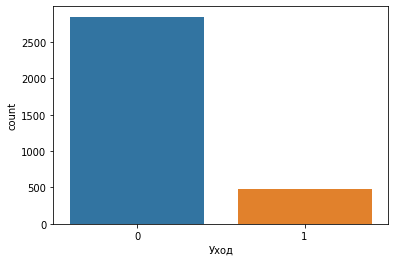

In [28]:
churn_graph = sns.countplot(x='Уход',data=df)

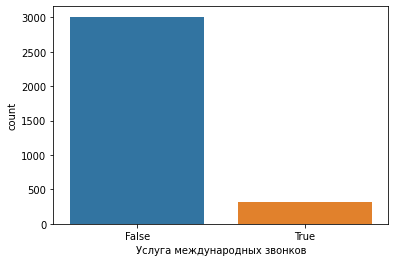

In [27]:
plan_inter=sns.countplot(x='Услуга международных звонков',data=df)

In [30]:
df.corrwith(df['Уход']).sort_values(ascending=False)

Уход                    1.000000
Обращений в СЦ          0.208750
Дневные минуты          0.205151
Дневная оплата          0.205151
Вечерние минуты         0.092796
Вечерняя оплата         0.092786
Международная оплата    0.068259
Международные минуты    0.068239
Ночная оплата           0.035496
Ночные минуты           0.035493
Дневные звонки          0.018459
Длина счета             0.016541
Вечерние звонки         0.009233
Ночные звонки           0.006141
Международные звонки   -0.052844
Количество VMail       -0.089728
Услуга VMail           -0.102148
dtype: float64

Text(0.5, 0, 'Дневная оплата vs Уход')

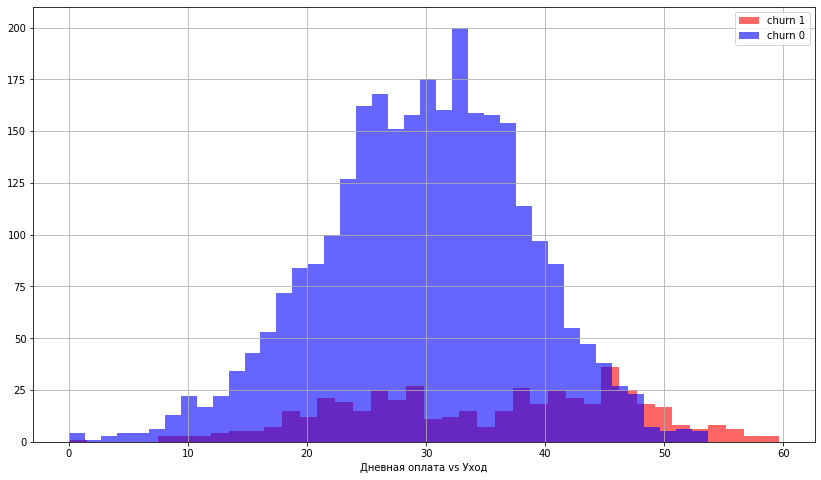

In [31]:
plt.figure(figsize=(14,8))
df[df['Уход']==1]['Дневная оплата'].hist(bins=40,color = 'red',label = 'churn 1',alpha = 0.6)
df[df['Уход']==0]['Дневная оплата'].hist(bins = 40,color = 'blue',label = 'churn 0',alpha = 0.6)
plt.legend()
plt.xlabel('Дневная оплата vs Уход')

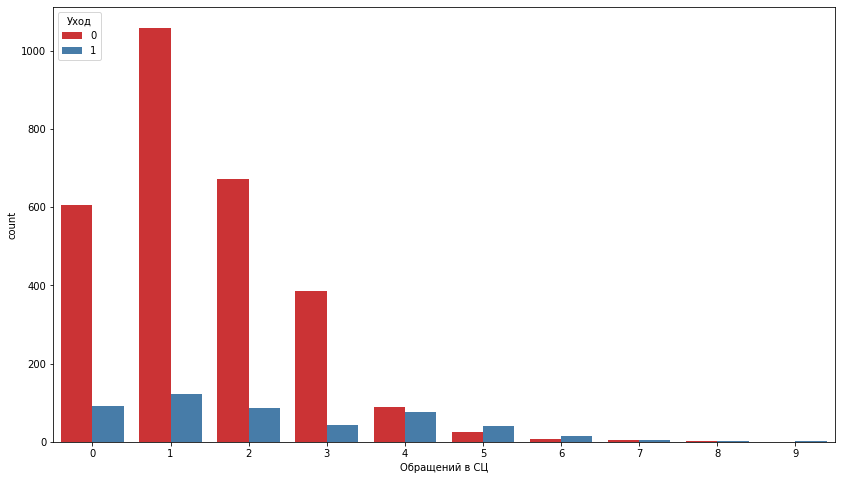

In [33]:
plt.figure(figsize=(14,8))
sns.countplot(x='Обращений в СЦ',hue = 'Уход',data=df,palette='Set1' )

# Model Building:

In [36]:
characters = df[['Длина счета','Услуга международных звонков', 
                 'Услуга VMail', 'Количество VMail',
                'Дневные звонки', 'Дневная оплата',
                'Вечерние звонки', 'Вечерняя оплата', 
                'Ночные звонки','Ночная оплата', 
                'Международные звонки',
                'Международная оплата', 'Обращений в СЦ']]
churn_val = df[['Уход']]

In [37]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler=MinMaxScaler()
characters = pd.DataFrame(minmax_scaler.fit_transform(characters),columns=characters.columns)

In [40]:
from sklearn.model_selection import train_test_split
characters_train, characters_test, target_train, target_test = train_test_split(characters, churn_val, test_size=0.30, random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state=42,class_weight='balanced').fit(characters_train, target_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [44]:
LR_model.intercept_

array([-0.38891041])

In [52]:
LR_model.coef_ 

array([[-1.67101494e-03,  2.13155540e+00, -1.99195982e-01,
        -2.00354771e-02, -9.28307098e-03,  5.43413728e-02,
        -7.20203697e-03,  4.17339126e-02, -1.13030627e-02,
         1.05736298e-02, -1.12161529e-01,  8.89929558e-02,
         4.69825763e-01]])

In [46]:
Log_Train_Pred = LR_model.predict(characters_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [47]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

**`Prediction on Train data`**

In [48]:
print(classification_report(target_train,Log_Train_Pred))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83      1993
           1       0.32      0.72      0.44       340

    accuracy                           0.73      2333
   macro avg       0.63      0.73      0.63      2333
weighted avg       0.85      0.73      0.77      2333



***Prediction on Test data***

In [53]:
Log_Test_Pred = LR_model.predict(characters_test)
print(classification_report(target_test,Log_Test_Pred))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       857
           1       0.34      0.76      0.47       143

    accuracy                           0.76      1000
   macro avg       0.64      0.76      0.65      1000
weighted avg       0.86      0.76      0.79      1000



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
